In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
import math
import tensorflow as tf

In [27]:
ticker = yf.Ticker("MCD")
data = ticker.history(interval = "1wk", period = "5Y")
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-28 00:00:00-05:00,160.561987,161.987231,157.203766,157.417557,16969300,0.00,0.0
2019-02-04 00:00:00-05:00,157.925264,159.822616,155.270762,155.662704,21222800,0.00,0.0
2019-02-11 00:00:00-05:00,156.099190,160.321449,154.469072,160.312546,22269600,0.00,0.0
2019-02-18 00:00:00-05:00,161.328048,163.376831,159.591042,163.163040,15937300,0.00,0.0
2019-02-25 00:00:00-05:00,163.840032,165.372164,162.129747,164.837708,13560500,1.16,0.0
...,...,...,...,...,...,...,...
2024-01-01 00:00:00-05:00,295.049988,297.989990,287.200012,288.989990,15595500,0.00,0.0
2024-01-08 00:00:00-05:00,288.510010,295.750000,287.519989,293.470001,11234700,0.00,0.0
2024-01-15 00:00:00-05:00,293.470001,301.079987,289.980011,300.529999,11329200,0.00,0.0


In [28]:
data["log_ret"] = np.log(data.Close) - np.log(data.Close.shift(1))
data["RSILR"] =ta.rsi(data.log_ret, length=15)
data["EMAFLR"]=ta.ema(data.log_ret, length=25)
data["EMAMLR"]=ta.ema(data.log_ret, length=100)
data["EMASLR"]=ta.ema(data.log_ret, length=150)
    
data["log_ret_next"] = data["log_ret"].shift(-1)
data.reset_index(inplace=True)
dates = data["Date"]
data.drop(["Volume", "Close", "Date", "Open", "High", "Low"], axis=1, inplace=True)
data = data.dropna(axis = 0)
data

,Dividends,Stock Splits,log_ret,RSILR,EMAFLR,EMAMLR,EMASLR,log_ret_next
149,0.0,0.0,0.066368,58.703853,0.007674,0.004310,0.003196,-0.012417
150,0.0,0.0,-0.012417,47.669905,0.006128,0.003979,0.002989,0.016109
151,0.0,0.0,0.016109,51.226386,0.006896,0.004219,0.003163,0.007940
152,0.0,0.0,0.007940,50.179974,0.006976,0.004293,0.003226,-0.003775
153,0.0,0.0,-0.003775,48.653030,0.006149,0.004133,0.003133,-0.035639
...,...,...,...,...,...,...,...,...
256,0.0,0.0,0.016355,51.853934,0.005653,0.002664,0.002393,-0.025689
257,0.0,0.0,-0.025689,45.598885,0.003242,0.002103,0.002021,0.015383
258,0.0,0.0,0.015383,51.697447,0.004176,0.002365,0.002198,0.023772
259,0.0,0.0,0.023772,52.854032,0.005684,0.002789,0.002483,-0.027904


In [29]:
from sklearn.preprocessing import MinMaxScaler # as using NN feed model with between 1 or 0
sc = MinMaxScaler(feature_range=(0,1))
data_scaled = sc.fit_transform(data)
print(data_scaled)
pd.DataFrame(data_scaled)

[[0.00000000e+00 0.00000000e+00 9.34279708e-01 1.00000000e+00
  9.95657105e-01 1.00000000e+00 9.90127896e-01 3.68958540e-01]
 [0.00000000e+00 0.00000000e+00 3.68958540e-01 3.52176252e-01
  9.04862208e-01 9.34433621e-01 9.22649857e-01 5.73651699e-01]
 [0.00000000e+00 0.00000000e+00 5.73651699e-01 5.60983946e-01
  9.49967204e-01 9.81982172e-01 9.79354021e-01 5.15032023e-01]
 [0.00000000e+00 0.00000000e+00 5.15032023e-01 4.99547128e-01
  9.54683936e-01 9.96567325e-01 1.00000000e+00 4.30972985e-01]
 [0.00000000e+00 0.00000000e+00 4.30972985e-01 4.09897373e-01
  9.06097494e-01 9.64945203e-01 9.69743040e-01 2.02335110e-01]
 [0.00000000e+00 0.00000000e+00 2.02335110e-01 1.77219123e-01
  7.17252427e-01 8.09052531e-01 8.02176271e-01 3.70658512e-01]
 [0.00000000e+00 0.00000000e+00 3.70658512e-01 3.73268398e-01
  6.48943916e-01 7.48195925e-01 7.38211565e-01 5.00211952e-01]
 [0.00000000e+00 0.00000000e+00 5.00211952e-01 5.17974980e-01
  6.67482611e-01 7.59314831e-01 7.53125227e-01 5.68442921e-01]


,0,1,2,3,4,5,6,7
0,0.0,0.0,0.934280,1.000000,0.995657,1.000000,0.990128,0.368959
1,0.0,0.0,0.368959,0.352176,0.904862,0.934434,0.922650,0.573652
2,0.0,0.0,0.573652,0.560984,0.949967,0.981982,0.979354,0.515032
3,0.0,0.0,0.515032,0.499547,0.954684,0.996567,1.000000,0.430973
4,0.0,0.0,0.430973,0.409897,0.906097,0.964945,0.969743,0.202335
...,...,...,...,...,...,...,...,...
107,0.0,0.0,0.575415,0.597828,0.876951,0.674180,0.728029,0.273729
108,0.0,0.0,0.273729,0.230583,0.735312,0.563045,0.606665,0.568442
109,0.0,0.0,0.568442,0.588641,0.790178,0.615102,0.664417,0.628636
110,0.0,0.0,0.628636,0.656546,0.878734,0.699010,0.757659,0.257837


In [30]:
X = []

backtest = 5
for j in range(5): # number of rows of inputs
    X.append([])
    for i in range(backtest, data_scaled.shape[0]):
        X[j].append(data_scaled[i-backtest:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

In [31]:
X, y = np.array(X), np.array(data_scaled[backtest:,-2:-1])
y = np.reshape(y,(len(y),1))
X.shape #9316 rows of 5 days of 5 inputs

(107, 5, 5)

In [32]:
y.shape

(107, 1)

In [33]:
q_80 = round(int(X.shape[0]) * 0.8)
q_90 = round(int(X.shape[0]) * 0.9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

In [34]:
def adapt_learning_rate(epoch):
    if epoch <= 10:
        return 0.001
    else:
        return 0.0001
from tensorflow.keras.callbacks import ModelCheckpoint
my_lr_scheduler = tf.keras.callbacks.LearningRateScheduler(adapt_learning_rate)

In [35]:
import tensorflow as tf
import keras
from keras.optimizers import Adam, RMSprop
from keras.callbacks import History
from keras.models import Model
from keras import layers
from keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

cp = ModelCheckpoint("stationary3/", save_best_only=True)
model = Sequential([layers.Input((backtest, 5), name="input"),
                    layers.LSTM(150),
                    layers.Dense(1, name = "Dense_layer"),
                    layers.Activation("linear", name = "output")])

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mse')
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, callbacks = [my_lr_scheduler, cp])


Epoch 1/20

1/3 [=========>....................] - ETA: 8s - loss: 0.3615INFO:tensorflow:Assets written to: stationary3\assets


INFO:tensorflow:Assets written to: stationary3\assets


3/3 [==============================] - 12s 4s/step - loss: 0.2288 - val_loss: 0.0349 - lr: 0.0010
Epoch 2/20
3/3 [==============================] - 0s 33ms/step - loss: 0.0281 - val_loss: 0.0595 - lr: 0.0010
Epoch 3/20
3/3 [==============================] - 0s 39ms/step - loss: 0.0206 - val_loss: 0.0567 - lr: 0.0010
Epoch 4/20
3/3 [==============================] - 0s 36ms/step - loss: 0.0202 - val_loss: 0.0638 - lr: 0.0010
Epoch 5/20
3/3 [==============================] - 0s 32ms/step - loss: 0.0218 - val_loss: 0.0505 - lr: 0.0010
Epoch 6/20
3/3 [==============================] - 0s 33ms/step - loss: 0.0206 - val_loss: 0.0507 - lr: 0.0010
Epoch 7/20
3/3 [==============================] - 0s 36ms/step - loss: 0.0194 - val_loss: 0.0688 - lr: 0.0010
Epoch 8/20
3/3 [==============================] - 0s 36ms/step - loss: 0.0200 - val_loss: 0.0530 - lr: 0.0010
Epoch 9/20
3/3 [==============================] - 0s 36ms/step - loss: 0.0194 - val_loss: 0.0458 - lr: 0.0010
Epoch 10/20
3/3 [=====

In [36]:
train_predictions = model.predict(X_train).flatten()
val_predictions = model.predict(X_val).flatten()
test_predictions = model.predict(X_test).flatten()

1/1 [==============================] - 0s 38ms/step


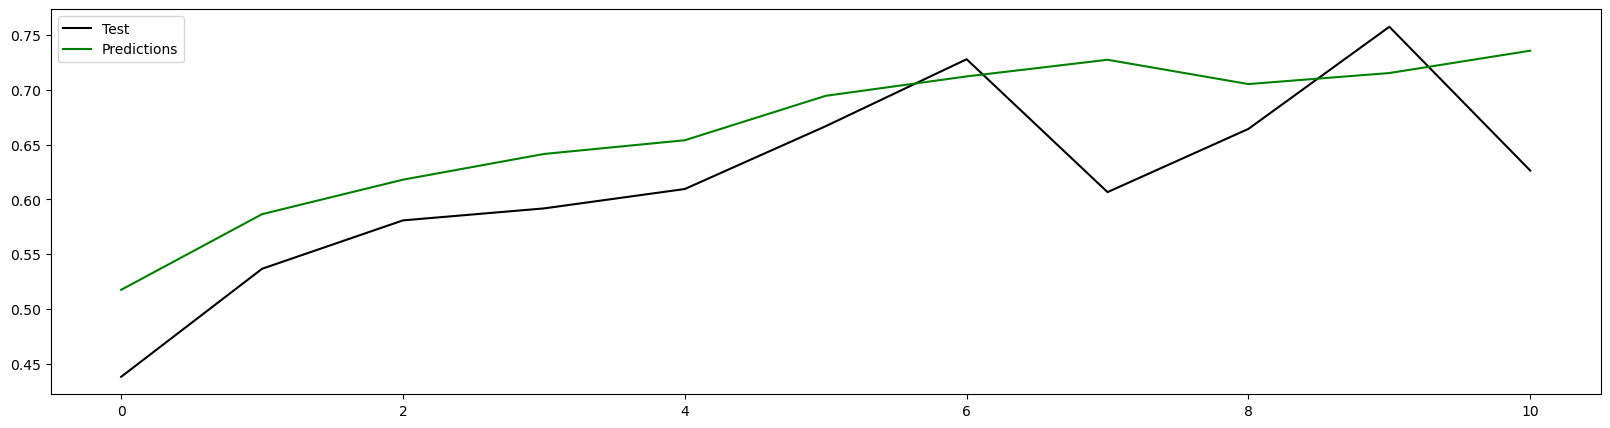

In [37]:
plt.figure(figsize=(20,5))
plt.plot(y_test, color = "black", label = "Test")
plt.plot(test_predictions, color = "green", label = "Predictions")
plt.legend()
plt.show()

In [11]:
from keras.models import load_model

filename = "stationary3"
model = load_model(filename)